# Imports

In [145]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

# Load the Starbucks Data

In [146]:
# read in the data
df1 = pd.read_csv("/Users/swatisharma/Documents/GitHub/archive-2/starbucks_drinkMenu_expanded.csv")


#Call the head method on data to print the first several rows of the data
df1.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [147]:
##Call the info method on data to see a summary of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [148]:
# Replace and removing spaces from the column names
df1.columns = df1.columns.str.replace(' ', '')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Beverage_category      242 non-null    object 
 1   Beverage               242 non-null    object 
 2   Beverage_prep          242 non-null    object 
 3   Calories               242 non-null    int64  
 4   TotalFat(g)            242 non-null    object 
 5   TransFat(g)            242 non-null    float64
 6   SaturatedFat(g)        242 non-null    float64
 7   Sodium(mg)             242 non-null    int64  
 8   TotalCarbohydrates(g)  242 non-null    int64  
 9   Cholesterol(mg)        242 non-null    int64  
 10  DietaryFibre(g)        242 non-null    int64  
 11  Sugars(g)              242 non-null    int64  
 12  Protein(g)             242 non-null    float64
 13  VitaminA(%DV)          242 non-null    object 
 14  VitaminC(%DV)          242 non-null    object 
 15  Calciu

# Number Of Missing Values By Column

In [149]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([df1.isnull().sum(), 100 * df1.isnull().mean()], axis=1)
missing.columns=["count", "%"]
missing.sort_values(by= ["count", "%"], ascending =[False, False], inplace = False)

,count,%
Caffeine(mg),1,0.413223
Beverage_category,0,0.000000
Beverage,0,0.000000
Beverage_prep,0,0.000000
Calories,0,0.000000
TotalFat(g),0,0.000000
TransFat(g),0,0.000000
SaturatedFat(g),0,0.000000
Sodium(mg),0,0.000000
TotalCarbohydrates(g),0,0.000000


In [250]:
# specifically confirming on columns "Sodium(mg)", "Calories"

missing_price = df1_new[["Sodium(mg)", "Calories"]].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    100.0
Name: count, dtype: float64

There are no missing values in any columns except Caffeine(mg), which is also not significant. So, drop all rows with any missing values. 

In [203]:
df1 = df1.dropna()
print(df1.head())

         Beverage_category  Calories TotalFat(g)  TransFat(g)  \
0                   Coffee         3         0.1          0.0   
1                   Coffee         4         0.1          0.0   
2                   Coffee         5         0.1          0.0   
3                   Coffee         5         0.1          0.0   
4  Classic Espresso Drinks        70         0.1          0.1   

   SaturatedFat(g)  Sodium(mg)  TotalCarbohydrates(g)  Cholesterol(mg)  \
0              0.0           0                      5                0   
1              0.0           0                     10                0   
2              0.0           0                     10                0   
3              0.0           0                     10                0   
4              0.0           5                     75               10   

   DietaryFibre(g)  Sugars(g)  Protein(g) VitaminA(%DV) VitaminC(%DV)  \
0                0          0         0.3            0%            0%   
1                0

# Explore the data

In [201]:
# # look at only the numeric columns
df1.describe()

,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,194.302905,1.310373,0.037759,6.369295,129.315353,36.066390,0.809129,33.024896,6.999170
std,102.858173,1.642843,0.071484,8.647768,82.200315,20.805942,1.448016,19.747558,4.871165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,190.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,51.000000,1.000000,44.000000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


# Highest Rated By Order Of Each Of The Summary Statistics

In [183]:
df1_new = df1.set_index('Beverage_category')
df1_new.head()

,Calories,TotalFat(g),TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV),Caffeine(mg)
Beverage_category,,,,,,,,,,,,,,,
Coffee,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Coffee,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Coffee,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
Coffee,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
Classic Espresso Drinks,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [184]:
df1_new.columns

Index(['Calories', 'TotalFat(g)', 'TransFat(g)', 'SaturatedFat(g)',
       'Sodium(mg)', 'TotalCarbohydrates(g)', 'Cholesterol(mg)',
       'DietaryFibre(g)', 'Sugars(g)', 'Protein(g)', 'VitaminA(%DV)',
       'VitaminC(%DV)', 'Calcium(%DV)', 'Iron(%DV)', 'Caffeine(mg)'],
      dtype='object')

# Beverage Category with highest in Calories

In [185]:
df1_new["Calories"].sort_values(ascending=False).head()

Beverage_category
Signature Espresso Drinks      510
Frappuccino® Blended Coffee    460
Signature Espresso Drinks      460
Tazo® Tea Drinks               450
Signature Espresso Drinks      450
Name: Calories, dtype: int64

Signature Espresso Drinks have the highest levels of Calories

How do the distributions of this feature look?

Text(0, 0.5, 'Count')

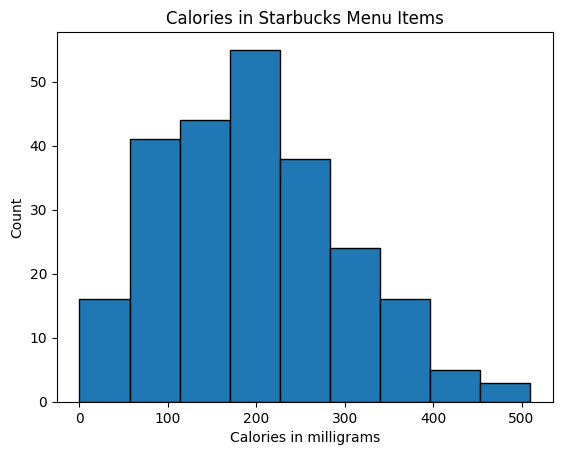

In [186]:
# get the calories column
calories = df1_new["Calories"]

# Plot a histogram of sodium content
plt.hist(calories, bins=9, edgecolor = "black")
plt.title("Calories in Starbucks Menu Items")
plt.xlabel("Calories in milligrams")
plt.ylabel("Count")

# Beverage Category with highest in Sodium levels

In [187]:
df1_new["Sodium(mg)"].sort_values(ascending=False).head()

Beverage_category
Tazo® Tea Drinks             40
Signature Espresso Drinks    35
Signature Espresso Drinks    35
Classic Espresso Drinks      35
Signature Espresso Drinks    35
Name: Sodium(mg), dtype: int64

Tazo® Tea Drinks dominates and contains the highest level of Sodium content

How do the distributions of this feature look?

Text(0, 0.5, 'Count')

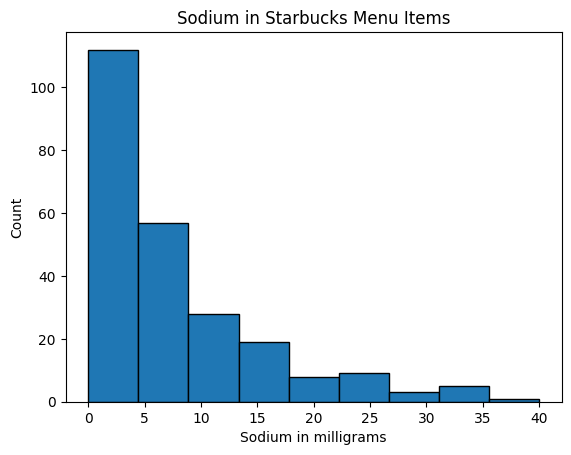

In [259]:
# get the sodium column
sodium = df1_new["Sodium(mg)"]

# Plot a histogram of sodium content
plt.hist(sodium, bins=9, edgecolor = "black")
plt.title("Sodium in Starbucks Menu Items")
plt.xlabel("Sodium in milligrams")
plt.ylabel("Count")

In [298]:
# Further exploring the column Sodium (mg)
#Filter the 'Sodium' column to print the values < than 5
df1_new.loc[df1_new["Sodium(mg)"] <5]

,Calories,TotalFat(g),TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV),Caffeine(mg)
Beverage_category,,,,,,,,,,,,,,,
Coffee,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Coffee,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Coffee,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
Coffee,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
Classic Espresso Drinks,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6%,0%,20%,8%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Frappuccino® Blended Crème,230,0.2,0.1,0.0,0,190,53,0,52,4.0,8%,6%,15%,4%,0
Frappuccino® Blended Crème,240,2,0.2,0.0,0,180,51,1,49,3.0,4%,6%,15%,8%,0
Frappuccino® Blended Crème,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0


# Beverage Category with highest in Cholesterol

In [223]:
df1_new["Cholesterol(mg)"].sort_values(ascending=False).head()

Beverage_category
Frappuccino® Blended Coffee    90
Frappuccino® Blended Coffee    90
Signature Espresso Drinks      89
Frappuccino® Blended Coffee    88
Frappuccino® Blended Coffee    80
Name: Cholesterol(mg), dtype: int64

Text(0, 0.5, 'Count')

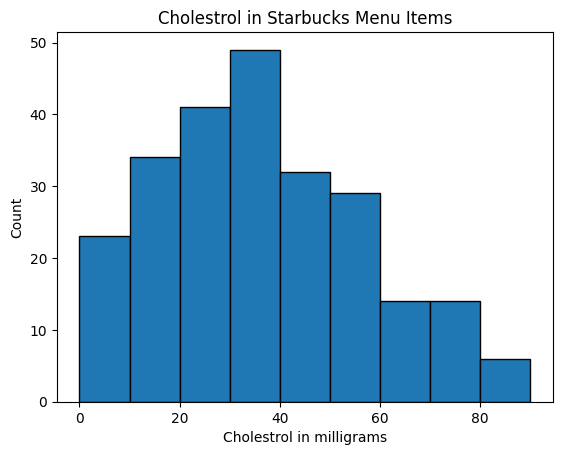

In [257]:
# get the Cholesterol column
cholestrol = df1_new["Cholesterol(mg)"]

# Plot a histogram of sodium content
plt.hist(cholestrol, bins=9, edgecolor = "black")
plt.title("Cholestrol in Starbucks Menu Items")
plt.xlabel("Cholestrol in milligrams")
plt.ylabel("Count")

# Beverage Category with highest in Sugar 

In [190]:
df1_new["Sugars(g)"].sort_values(ascending=False).head()

Beverage_category
Frappuccino® Blended Coffee    84
Frappuccino® Blended Coffee    84
Signature Espresso Drinks      83
Frappuccino® Blended Coffee    80
Frappuccino® Blended Coffee    77
Name: Sugars(g), dtype: int64

Frappuccino® Blended Coffee have highest level of sugar.

How do the distributions of these two new features look?

Text(0, 0.5, 'Count')

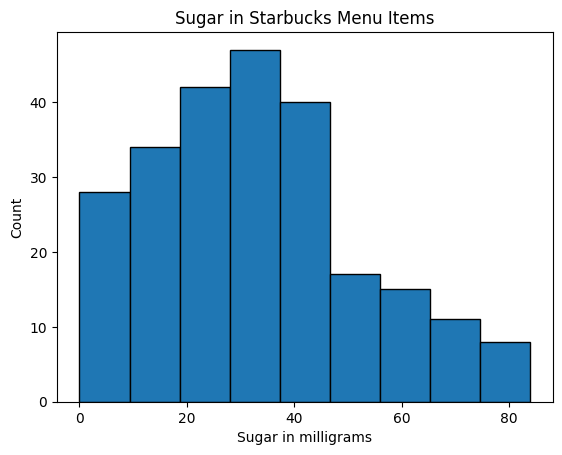

In [191]:
# get the sugars column
sugars = df1_new["Sugars(g)"]

# Plot a histogram of sodium content
plt.hist(sugars, bins=9, edgecolor = "black")
plt.title("Sugar in Starbucks Menu Items")
plt.xlabel("Sugar in milligrams")
plt.ylabel("Count")

They have not any kind of long tails or outliers on them.

# Distribution Of Category By Category And Sodium(mg)

Our primary focus is our understanding the distribution amond various categories in terms of various attributes. Also, understanding what your primary target response feature should be ("Sodium(mg)", "Calories")

In [266]:
# Calculate "Sodium(mg)", "Calories by Beverage_category and sort by the average of the two
# Hint: use the pattern dataframe.groupby(<grouping variable>)[<list of columns>].mean()
cat_means = df1_new.groupby("Beverage_category")[["Sodium(mg)", "Calories", "Cholesterol(mg)", "Sugars(g)"]].mean()
cat_means.head()

,Sodium(mg),Calories,Cholesterol(mg),Sugars(g)
Beverage_category,,,,
Classic Espresso Drinks,8.103448,140.172414,20.327586,16.965517
Coffee,0.000000,4.250000,0.000000,0.000000
Frappuccino® Blended Coffee,4.444444,276.944444,59.638889,57.083333
Frappuccino® Blended Crème,4.230769,233.076923,49.923077,48.461538
Frappuccino® Light Blended Coffee,1.666667,162.500000,34.500000,32.416667


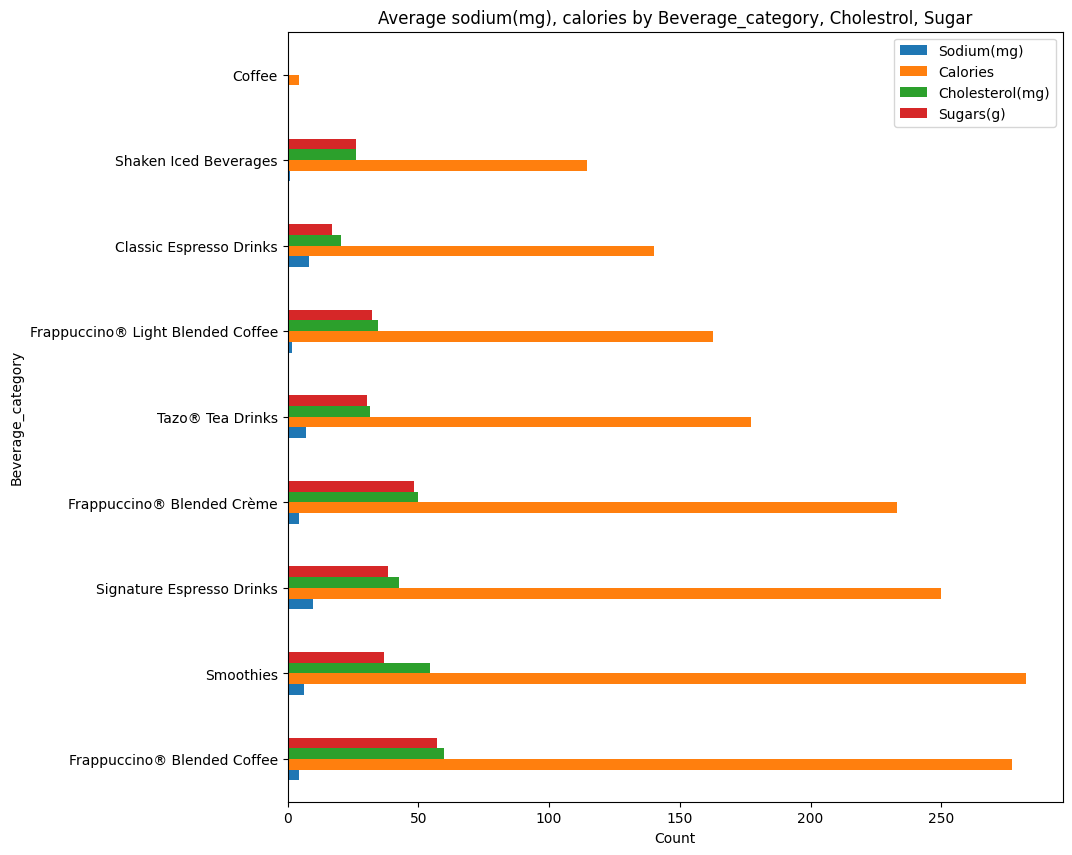

In [269]:
# The next bit simply reorders the index by increasing average of "Sodium(mg)", "Calories", "Cholesterol", "Sugar"
# Compare the index order you get from cat_means.index with cat_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(cat_means.reindex(index=cat_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average sodium(mg), calories by Beverage_category, Cholesterol, Sugar'))
plt.xlabel('Count');

Some key observations from above plot:

Coffee is the least caloried Starbucks drink with no sodium content.

Smoothies and Frappucino Blended Coffee is the most caloried Starbucks drink with highest amount of sugars and Cholesterol.

Starbucks Signature Espresso Drinks contains the highest amount of Calories among other categories. 

# Visualizing High Dimensional Data

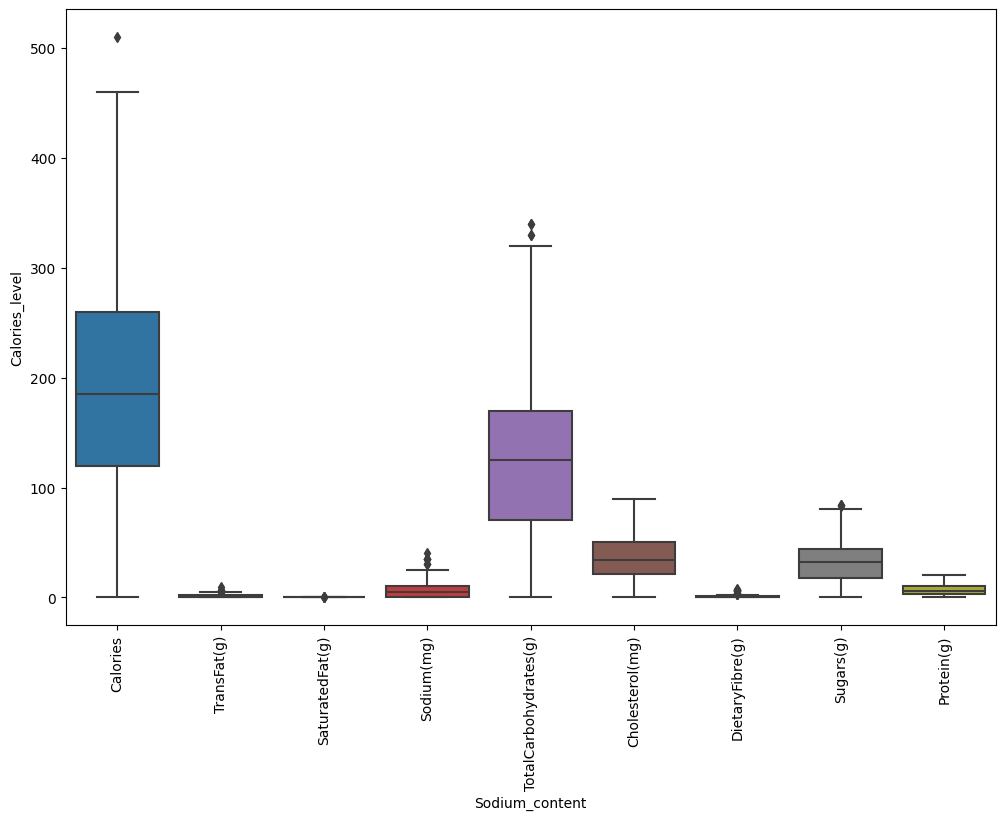

In [244]:
# Create a seaborn boxplot of the df1_new dataframe we created above,to again confirm for the outliers
# in each columns. This will use boxplot's data argument.

plt.subplots(figsize=(12, 8))
sns.boxplot(data=df1_new)
plt.xticks(rotation='vertical')
plt.ylabel('Calories_level')
plt.xlabel('Sodium_content');

# Distributions Of Feature Values

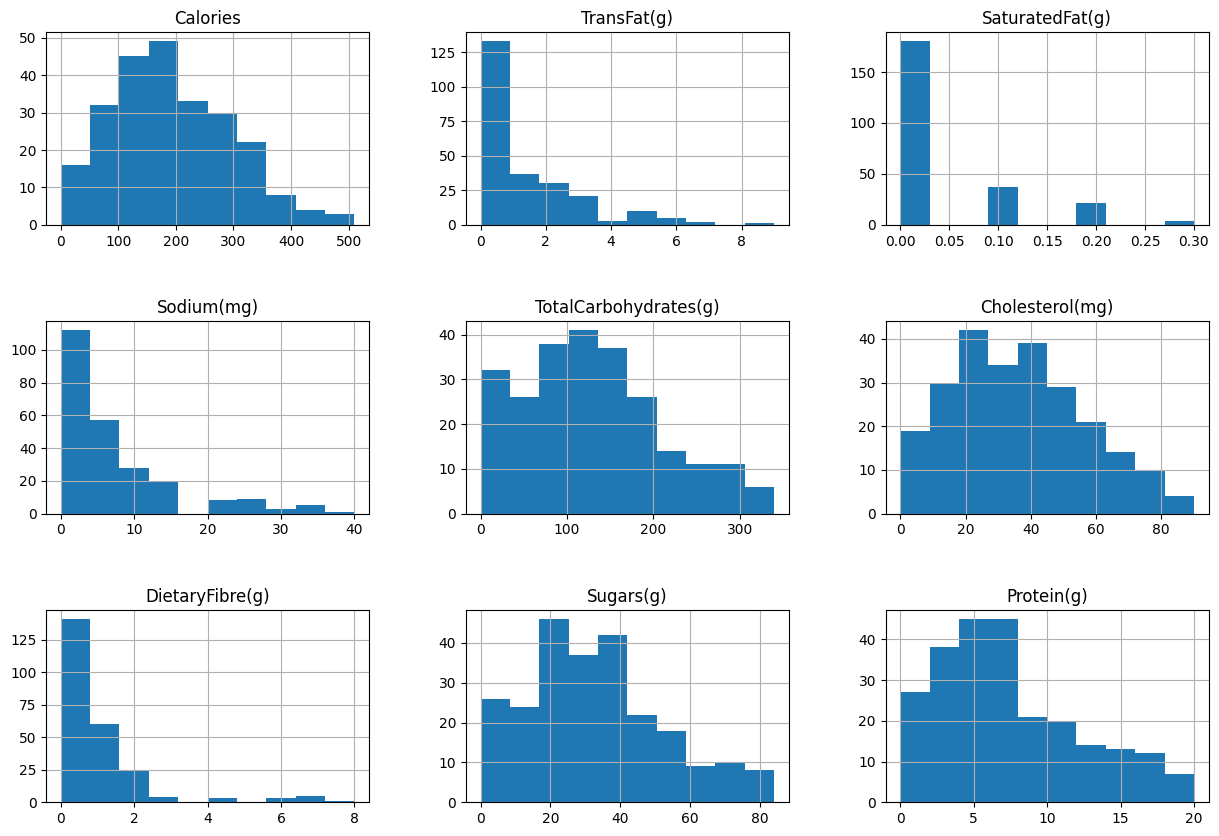

In [246]:
#Call data's `hist` method to plot histograms of each of the numeric features
#Passed it an argument figsize=(15,10)
#Calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing

df1_new.hist(figsize = (15, 10))
plt.subplots_adjust(hspace=0.5);


Analysing which features are concerning, these distributions are much better. There are clearly some skewed distributions, so will keep an eye on TransFat(g), SaturatedFat(g) and DietaryFibre(g).

Based on the shape of data distribution, here are some other observations:

Sodium(mg), TransFat(g) and Protein(g) are somewhat right-skewed distribution (positively skewed) with some outliers that verify the high content of some of the starbucks drinks. 

Calories and TotalCarbohydrates(g) are somewhat symmetric and normal distributed with quite a bell curve.

Cholesterol(mg) and Sugars(g) are somewhat non-symmetric bimodal distribution with two modes.


# Target Feature

Is there any relationship between "Sodium(mg)" and "Calories"?

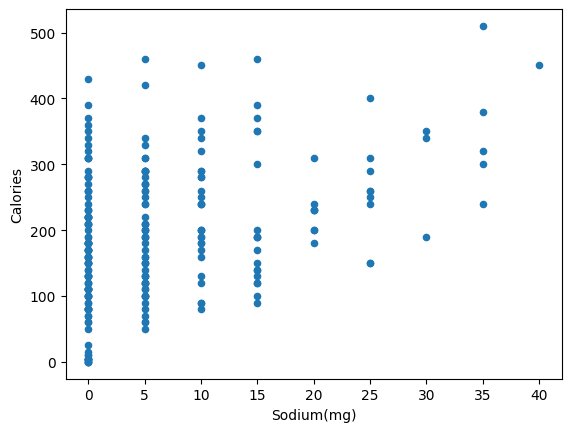

In [256]:
#Use data's `plot()` method to create a scatterplot (kind='scatter') with 'Sodium(mg)' on the x-axis and
#'Calories' on the y-axis
df1_new.plot(x="Sodium(mg)", y="Calories", kind= "scatter");

These both features are independent of each other and there is no relationship between these features.

# Conclusion

Starbucks Corporation, an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington is known for introducing a wide variety of coffee experiences. They started as a coffee bean wholesaler but soon transitioned into a coffee shop. 

Starbucks serves hot and cold drinks, whole-bean coffee, micro-ground instant coffee, espresso, caffe latte, full and loose-leaf teas, juices, Frappuccino beverages, pastries, and snacks.

To better understand Starbucks beverage nutritional facts, I explored their drinks data among various beverage categories including coffees, teas and frappucino's.

Here are some key observations:

The biggest culprit is Frappucino Blended Coffee, which trumps all other Starbucks drinks in calorie count and grams of carbs, as it has a whopping 50 grams of Sugars.

Smoothies are another highest Caloried drink with >250 calorie content (highest among Starbucks drinks) and > 50gm of Cholesterol. 

Instant Coffee is the least caloried drink with no sugar, carbs and cholestrol content. 

